# 8장

In [3]:
import matplotlib
matplotlib.rc('font', family="NanumBarunGothicOTF")  

%matplotlib inline

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(
        range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

df = get_iris_df()

# 8.4 

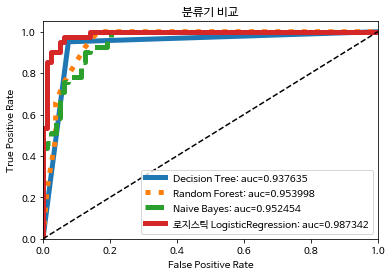

In [6]:
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# 분류기 이름 -> (선 스타일, 분류기 인스턴스)
CLASS_MAP = {
   '로지스틱 회귀':
        ('-', LogisticRegression()),
   '나이브 베이즈': ('--', GaussianNB()),
    '결정 트리':
       ('.-', DecisionTreeClassifier(max_depth=5)),
    '랜덤 포레스트':
       (':', RandomForestClassifier(
            max_depth=5, n_estimators=10,
            max_features=1)),
}

# 데이터프레임 행을 학습/시험셋으로 나눈다.
X, Y = df[df.columns[:3]], (df['species']=='virginica')
X_train, X_test, Y_train, Y_test = \
       train_test_split(X, Y, test_size=.8)

for name, (line_fmt, model) in CLASS_MAP.items():
    model.fit(X_train, Y_train)
    # 열마다 True/False 예측값을 저장한다.
    preds = model.predict_proba(X_test)	 # 모양: (120, 2)
    pred = pd.Series(preds[:,1])
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label='%s: auc=%f' % (name, auc_score)
    plt.plot(fpr, tpr, line_fmt,linewidth=5, label=label)

plt.legend(loc="lower right")
plt.title('분류기 성능 비교')
   
plt.plot([0, 1], [0, 1], 'k--') #x=y line.  Visual aid
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()